## Market Basket Analysis

### Exploratory Data Analysis

<b> Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<b>Random seed set

In [2]:
np.random.seed(555)

<b> Dataset loading

In [3]:
df = pd.read_csv("Groceries data.csv")

<b> Statistical Exploration

In [4]:
print("Shape:",df.shape, end="\n\n")
print("Head:\n", df.head())
print(f"\nNull Values:\n{df.isnull().sum()}", end="\n\n")
print(df.info(), end="\n\n")
print(f"Unique Values:\n{df.nunique()}", end="\n\n")
print(f"Describe():\n{df.describe()}")

Shape: (38765, 7)

Head:
    Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

Null Values:
Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  objec

<b> Items overview

In [5]:
df["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

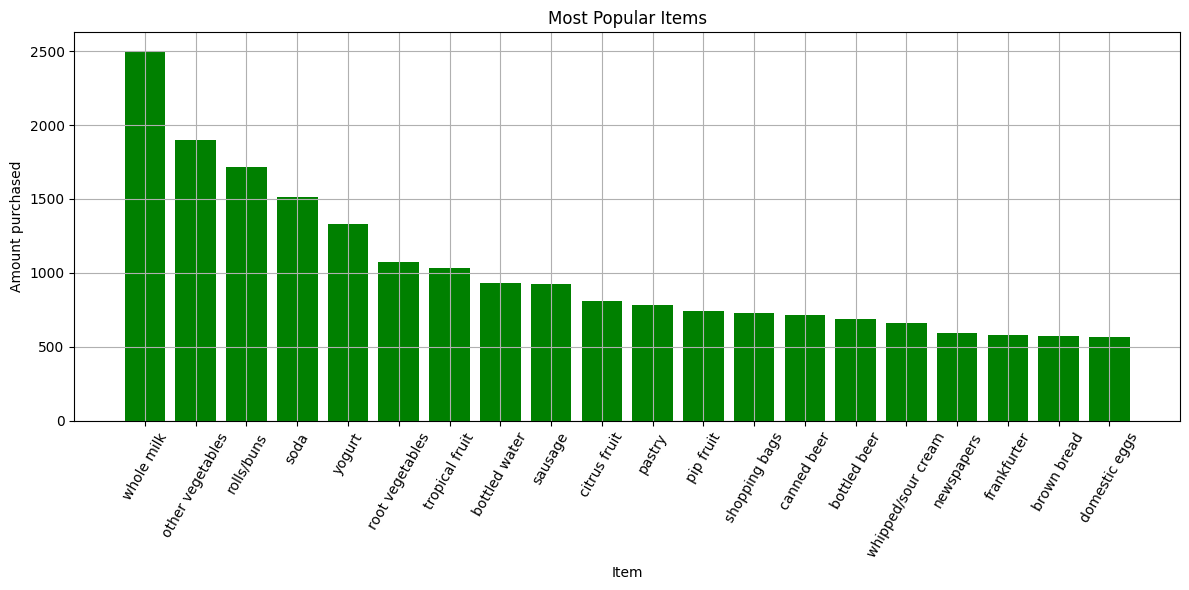

In [6]:
popular_items = df.value_counts("itemDescription").head(20)
plt.figure(figsize=(12, 6))
plt.bar(popular_items.index, popular_items, color="green")

plt.title("Most Popular Items")
plt.xlabel("Item")
plt.ylabel("Amount purchased")
plt.grid(True)

plt.xticks(rotation=60)  

plt.tight_layout()
plt.show()

In [7]:
# Identify duplicate rows based on all columns
duplicates = df[df.duplicated()]
duplicates.shape

(759, 7)

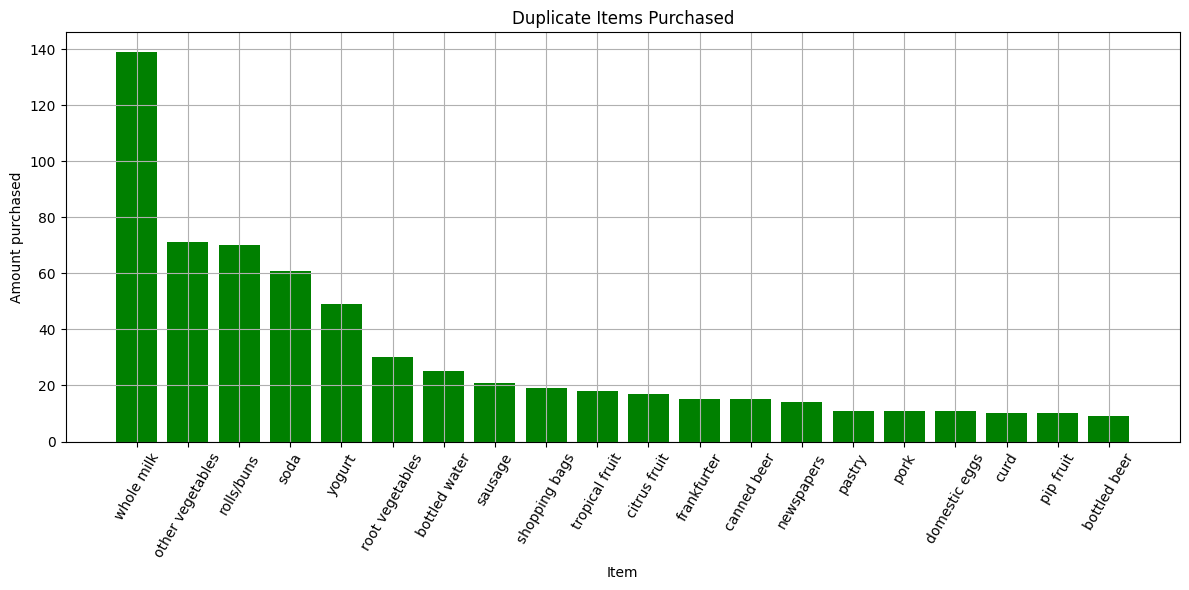

In [8]:
dupl_df = duplicates.value_counts("itemDescription").head(20)

plt.figure(figsize=(12, 6))
plt.bar(dupl_df.index, dupl_df, color="green")

plt.title("Duplicate Items Purchased")
plt.xlabel("Item")
plt.ylabel("Amount purchased")
plt.grid(True)

plt.xticks(rotation=60) 

plt.tight_layout()
plt.show()

<b> Members overview

In [9]:
def member_explore(df, num):
    #df.sortby("Date", )
    df = df[df["Member_number"]==num]
    df= df.sort_values("Date")
    df.head(10)
    return df

In [10]:
member_explore(df, 4056)

,Member_number,Date,itemDescription,year,month,day,day_of_week
11117,4056,2014-03-10,soda,2014,3,10,0
27266,4056,2014-03-10,domestic eggs,2014,3,10,0
12908,4056,2014-06-16,rolls/buns,2014,6,16,0
29057,4056,2014-06-16,cream cheese,2014,6,16,0
36907,4056,2014-06-16,yogurt,2014,6,16,0
13063,4056,2014-10-05,tropical fruit,2014,10,5,6
29212,4056,2014-10-05,salty snack,2014,10,5,6
6296,4056,2015-08-29,packaged fruit/vegetables,2015,8,29,5
22445,4056,2015-08-29,herbs,2015,8,29,5
1048,4056,2015-10-20,tropical fruit,2015,10,20,1


In [11]:
df["Member_number"].nunique()

3898

<b> Date overview

In [12]:
df_date = df
df_date['date'] = pd.to_datetime(df_date['Date'])
df_date=df_date.set_index(['date'])

#df_date = df_date.drop(["Member_number", "transaction_num"], axis=1)
df_date.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
date,,,,,,,
2015-07-21,1808,2015-07-21,tropical fruit,2015,7,21,1
2015-05-01,2552,2015-05-01,whole milk,2015,5,1,4
2015-09-19,2300,2015-09-19,pip fruit,2015,9,19,5
2015-12-12,1187,2015-12-12,other vegetables,2015,12,12,5
2015-01-02,3037,2015-01-02,whole milk,2015,1,2,4


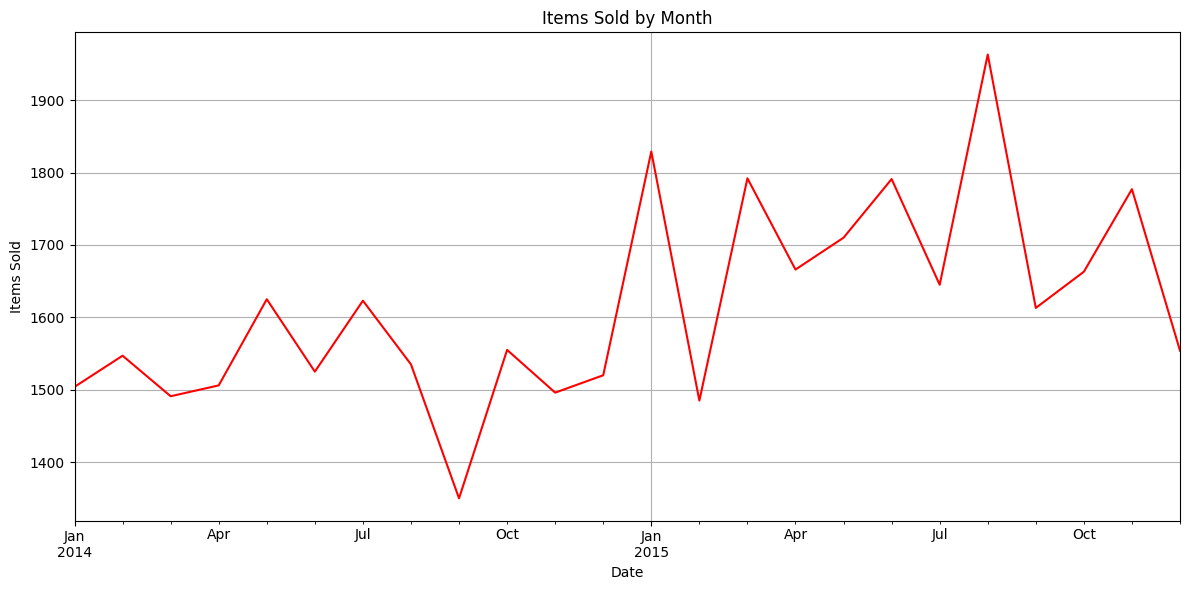

In [13]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (12,6), grid = True, color="red")

plt.xlabel('Date')
plt.ylabel('Items Sold')
plt.title('Items Sold by Month')
plt.tight_layout() 
plt.show()

In [14]:
print("min date:", df_date["Date"].min())
print("max date:", df_date["Date"].max())

min date: 2014-01-01
max date: 2015-12-30


### Data Wrangling

In [15]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date
0,1808,2015-07-21,tropical fruit,2015,7,21,1,2015-07-21
1,2552,2015-05-01,whole milk,2015,5,1,4,2015-05-01
2,2300,2015-09-19,pip fruit,2015,9,19,5,2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,2015-12-12
4,3037,2015-01-02,whole milk,2015,1,2,4,2015-01-02


<b> Duplicates

In [16]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(38006, 8)

<b>Typecasting

In [17]:
df["Member_number"] = df["Member_number"].astype(str)
df = df.rename(columns={"Member_number": "id", "itemDescription": "item"})

<b> White Space Removal

In [18]:
df["item"] = df["item"].str.strip()
df["id"] = df["id"].str.strip()
df["Date"] = df["Date"].str.strip()

<b> Creating transaction feature

In [19]:
transaction = lambda x: str(x["id"])+"-"+str(x["Date"])
df["transaction"] = df.apply(transaction, axis=1)

<b> Dropping features

In [20]:
cols = ["year", "month", "day", "day_of_week", "Date", "date", "id"] 
df = df.drop(cols, axis=1)
df.head()

,item,transaction
0,tropical fruit,1808-2015-07-21
1,whole milk,2552-2015-05-01
2,pip fruit,2300-2015-09-19
3,other vegetables,1187-2015-12-12
4,whole milk,3037-2015-01-02


<b>Grouping the dataset by transaction 

In [21]:
basket = df.groupby(["transaction", "item"])["item"].apply(lambda x: 1).unstack().fillna(0).reset_index().set_index("transaction")
basket

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000-2014-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000-2015-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000-2015-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000-2015-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000-2015-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999-2015-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4999-2015-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5000-2014-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b> Further Encoding

In [22]:
def encoding(x, true=True, false=False):
    if x <= 0:
        return false
    elif x >= 1:
        return true
    
basket_enc = basket.applymap(encoding)
basket_enc

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000-2014-06-24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1000-2015-03-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1000-2015-05-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000-2015-07-24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000-2015-11-25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999-2015-05-16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4999-2015-12-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5000-2014-09-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Frequent Item Sets

In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
frequent_itemsets = apriori(basket_enc, min_support=0.002, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values("confidence", ascending=False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,3.821049e-05,1.002659,0.014188
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
17,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134,9.039652e-05,1.006176,0.042990
27,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991,8.223631e-05,1.005593,0.039112
1,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.303311e-05,1.000682,0.004984
8,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,2.117455e-04,1.010188,0.077260
22,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
33,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,8.775684e-05,1.001613,0.015702
35,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,5.648409e-04,1.010345,0.104587
13,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,9.078510e-04,1.029531,0.319493


In [25]:
rules.shape

(36, 10)

In [26]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
17,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134,0.000090,1.006176,0.042990
27,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991,0.000082,1.005593,0.039112
1,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,0.000013,1.000682,0.004984


### Refining into categories

In [27]:
df["item"].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese',
       'liquor', 'pickled vegetables', 'liquor (appetizer)

In [28]:
df1 = df
df1['item'] = df1['item'].str.strip().str.split().str[-1]

In [29]:
basket = df1.groupby(["transaction","item"])["item"].apply(lambda x: 1).unstack().fillna(0).reset_index().set_index("transaction")
basket_enc = basket.applymap(encoding)

In [30]:
frequent_itemsets = apriori(basket_enc, min_support=0.002, 
                            use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values("confidence", ascending=False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(frankfurter),(vegetables),0.037760,0.222482,0.008421,0.223009,1.002368,1.988911e-05,1.000678,0.002455
28,(ham),(milk),0.017109,0.179509,0.003074,0.179688,1.000992,3.046120e-06,1.000217,0.001008
18,(chocolate),(fruit),0.040299,0.164740,0.006950,0.172471,1.046930,3.115663e-04,1.009343,0.046709
5,(bar),(fruit),0.020116,0.164740,0.003408,0.169435,1.028503,9.445652e-05,1.005653,0.028282
25,(food),(fruit),0.016307,0.164740,0.002740,0.168033,1.019990,5.370015e-05,1.003958,0.019923
31,(juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
35,(sausage),(soda),0.061752,0.097106,0.006015,0.097403,1.003052,1.830352e-05,1.000328,0.003243
1,(UHT-milk),(cheese),0.021386,0.084809,0.002072,0.096875,1.142270,2.580403e-04,1.013360,0.127272
37,(sausage),(yogurt),0.061752,0.085879,0.005881,0.095238,1.108986,5.779767e-04,1.010345,0.104744
9,(bread),(beer),0.069638,0.090356,0.006549,0.094050,1.040879,2.572230e-04,1.004077,0.042213


In [31]:
rules.shape

(38, 10)

### Item Relation Prediction

In [32]:
frequent_itemsets = apriori(basket_enc, min_support=0.001,use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(298, 10)

In [33]:
def predict_conseq(item, df, col="antecedents"):
    # Filter the rules where the antecedent matches the input item
    r1 = rules[rules[col].apply(lambda x: item in x)]
    r1 = r1.sort_values("confidence", ascending=False)
   
    
    return r1

In [34]:
r1 = predict_conseq("beer", rules)
r1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
182,"(beer, cheese)",(vegetables),0.005146,0.222482,0.001337,0.259740,1.167466,0.000192,1.050331,0.144186
178,"(beer, cheese)",(milk),0.005146,0.179509,0.001136,0.220779,1.229903,0.000212,1.052963,0.187895
184,"(beer, rolls/buns)",(milk),0.007953,0.179509,0.001470,0.184874,1.029884,0.000043,1.006581,0.029250
192,"(beer, milk)",(yogurt),0.014436,0.085879,0.001270,0.087963,1.024272,0.000030,1.002286,0.024044
196,"(beer, vegetables)",(sausage),0.015906,0.061752,0.001270,0.079832,1.292776,0.000288,1.019648,0.230131
22,(beer),(bread),0.090356,0.069638,0.006549,0.072485,1.040879,0.000257,1.003069,0.043175
174,"(beer, vegetables)",(bread),0.015906,0.069638,0.001136,0.071429,1.025706,0.000028,1.001928,0.025467
188,"(beer, milk)",(sausage),0.014436,0.061752,0.001002,0.069444,1.124564,0.000111,1.008266,0.112389
36,(beer),(sausage),0.090356,0.061752,0.005748,0.063609,1.030074,0.000168,1.001983,0.032096
30,(beer),(newspapers),0.090356,0.038896,0.003542,0.039201,1.007848,0.000028,1.000318,0.008560


In [35]:
r1 = predict_conseq("beer", rules, "consequents")
r1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,(powder),(beer),0.009223,0.090356,0.001203,0.130435,1.443562,0.000370,1.046090,0.310129
25,(dishes),(beer),0.009022,0.090356,0.001136,0.125926,1.393661,0.000321,1.040694,0.285037
197,"(vegetables, sausage)",(beer),0.011495,0.090356,0.001270,0.110465,1.222551,0.000231,1.022606,0.184155
189,"(milk, sausage)",(beer),0.009624,0.090356,0.001002,0.104167,1.152845,0.000133,1.015416,0.133869
193,"(yogurt, milk)",(beer),0.012564,0.090356,0.001270,0.101064,1.118505,0.000135,1.011911,0.107297
33,(oil),(beer),0.014903,0.090356,0.001470,0.098655,1.091842,0.000124,1.009207,0.085389
27,(food),(beer),0.016307,0.090356,0.001604,0.098361,1.088588,0.000131,1.008878,0.082728
175,"(vegetables, bread)",(beer),0.011562,0.090356,0.001136,0.098266,1.087539,0.000091,1.008772,0.081434
3,(articles),(beer),0.013700,0.090356,0.001337,0.097561,1.079737,0.000099,1.007984,0.074875
179,"(milk, cheese)",(beer),0.011829,0.090356,0.001136,0.096045,1.062962,0.000067,1.006293,0.059941


## Classification

<p style='text-align: justify;'>The classification problem chosen for this dataset is to determine if a customer in the dataset has been a recent customer. A recent customer is defined as a customer that has made a purchase in the last three months. Two classification models will be used; Logistic Regression and Random Forest.

<b> Dataset reimported

In [36]:
df = pd.read_csv("Groceries data.csv")

### Exploratory Data Analysis

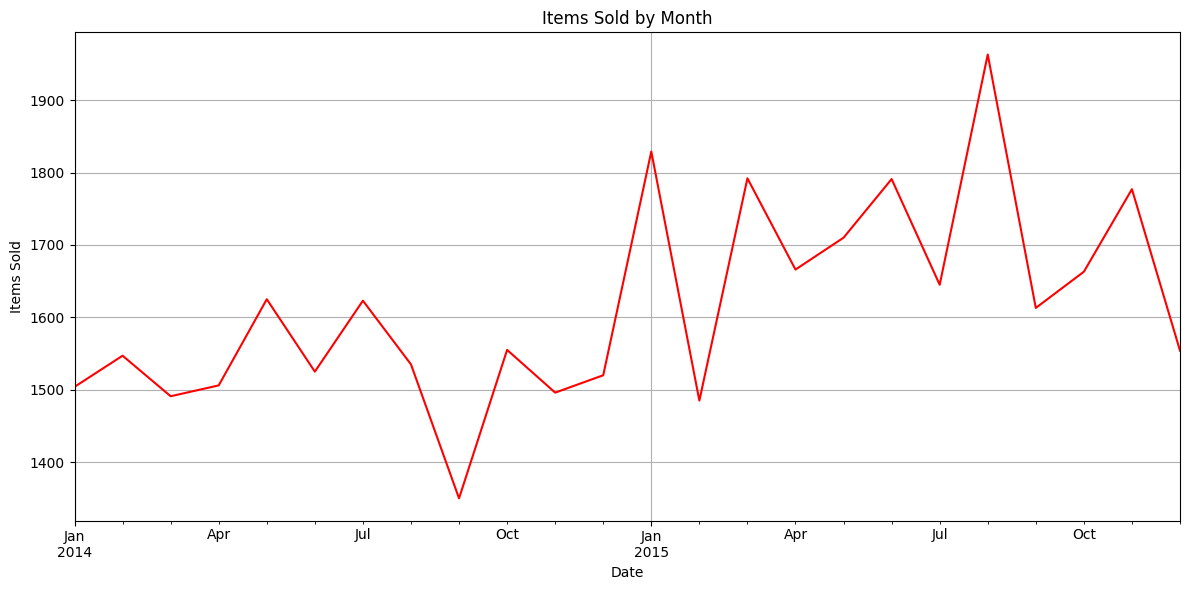

In [37]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (12,6), grid = True, color="red")

plt.xlabel('Date')
plt.ylabel('Items Sold')
plt.title('Items Sold by Month')
plt.tight_layout() 
plt.show()

In [38]:
df1 = df[df["Date"] > "2015-10-30"]
df1 = df1.sort_values("Date")
print("Number of customers in last three months of 2015:", df1["Member_number"].nunique())
print("Total number of customers in the dataset:", df["Member_number"].nunique())

Number of customers in last three months of 2015: 1030
Total number of customers in the dataset: 3898


### Data Wrangling

<b> Renaming features

In [39]:
df = df.rename(columns={"Member_number": "id", "Date":"date", "itemDescription": "item"})

<b>Extracting Target Variable

In [40]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df

,id,date,item,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [41]:
print(df['date'].min())
print(df['date'].max())

2014-01-01 00:00:00
2015-12-30 00:00:00


In [42]:
df_year = df.sort_values(["id", "year","month", "day"])
df_year = df_year.groupby(["id"])["date"].last().reset_index()
df_year = df_year.rename(columns={"date": "last_purchace"})
df_year["recent_purchace"] = df_year["last_purchace"].apply(lambda x: 1 if x > datetime(2015,9,30) else 0)
df_year = df_year.drop("last_purchace", axis=1)
df_year = df_year.set_index("id")
df_year.head()

,recent_purchace
id,
1000,1
1001,0
1002,0
1003,1
1004,0


In [43]:
df_year.value_counts()

recent_purchace
0                  2495
1                  1403
Name: count, dtype: int64

<b> Mapping Day

In [44]:
mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_day = df
df_day["day"] = df["day_of_week"].map(mapping)
df_day.head()

,id,date,item,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,Tuesday,1
1,2552,2015-05-01,whole milk,2015,5,Friday,4
2,2300,2015-09-19,pip fruit,2015,9,Saturday,5
3,1187,2015-12-12,other vegetables,2015,12,Saturday,5
4,3037,2015-01-02,whole milk,2015,1,Friday,4


In [45]:
df_day = df_day.groupby(["id", "day"])[["day"]].apply(lambda x: 1).unstack().fillna(0).reset_index().set_index("id")
df_day.head()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
id,,,,,,,
1000,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1001,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1002,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1003,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1004,0.0,1.0,0.0,1.0,1.0,1.0,1.0


<b>Mapping Month

In [46]:
mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
           7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_month = df
df_month["month"] = df["month"].map(mapping)
df_month.head()

,id,date,item,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,July,Tuesday,1
1,2552,2015-05-01,whole milk,2015,May,Friday,4
2,2300,2015-09-19,pip fruit,2015,September,Saturday,5
3,1187,2015-12-12,other vegetables,2015,December,Saturday,5
4,3037,2015-01-02,whole milk,2015,January,Friday,4


In [47]:
df_month = df_month.groupby(["id", "month"])[["month"]].apply(lambda x: 1).unstack().fillna(0).reset_index().set_index("id")
df_month.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1001,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1003,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1004,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_day = pd.merge(df_month, df_day, left_index=True, right_index=True)

<b>Items

In [49]:
items_df = df.groupby(["id","item" ])["item"].apply(lambda x: 1).unstack().fillna(0).reset_index().set_index("id")
items_df.head()

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<b>Average items bought

In [50]:
df_avg_items = df.sort_values(["id", "date"])
df_avg_items = df_avg_items.groupby(["id", "date"])["item"].agg(list).reset_index()#.set_index("id")
df_avg_items["average_items"] = df_avg_items["item"].apply(lambda x: len(x))

df_avg_items = df_avg_items.groupby(["id"])["average_items"].mean().reset_index().set_index("id")

df_avg_items.head()

,average_items
id,
1000,2.600
1001,2.400
1002,2.000
1003,2.000
1004,2.625


<b>Total items bought

In [51]:
df_total_items = df.sort_values(["id", "date"])
df_total_items["total_items"] = 1
df_total_items = df_total_items.groupby(["id"])["total_items"].agg(sum).reset_index().set_index("id")
df_total_items.head()

,total_items
id,
1000,13
1001,12
1002,8
1003,8
1004,21


<b>Total transactions

In [52]:
df_transactions = df.sort_values(["id", "date"])
df_transactions = df_transactions.groupby(["id"])["date"].nunique().reset_index(name="transactions")


df_transactions = df_transactions.set_index("id")
df_transactions.head()

,transactions
id,
1000,5
1001,5
1002,4
1003,4
1004,8


<b>Merging continuous features

In [53]:
contin_merge = pd.merge(df_avg_items, df_total_items, left_index=True, right_index=True)
contin_merge = pd.merge(contin_merge, df_transactions, left_index=True, right_index=True)
contin_merge.head()

,average_items,total_items,transactions
id,,,
1000,2.600,13,5
1001,2.400,12,5
1002,2.000,8,4
1003,2.000,8,4
1004,2.625,21,8


<b>Scaling continuous features

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = StandardScaler()
#scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(contin_merge)

# Transform the data
scaled_data = scaler.transform(contin_merge)
scaled_data = pd.DataFrame(scaled_data, columns=contin_merge.columns)

scaled_data= scaled_data.set_index(contin_merge.index)
scaled_data.head()

,average_items,total_items,transactions
id,,,
1000,0.010978,0.575347,0.616620
1001,-0.287675,0.387027,0.616620
1002,-0.884980,-0.366253,0.085676
1003,-0.884980,-0.366253,0.085676
1004,0.048310,2.081905,2.209453


<b>Encoding in binary

In [55]:
df_day = df_day.applymap(encoding, true=1, false=0)
items_df = items_df.applymap(encoding, true=1, false=0)

In [56]:
items_df.head()

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<b>Merging all

In [57]:
merged_df = pd.merge(scaled_data, items_df, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_day, left_index=True, right_index=True)
merged_df.head()

,average_items,total_items,transactions,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
id,,,,,,,,,,,,,,,,,,,,,
1000,0.010978,0.575347,0.616620,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,1
1001,-0.287675,0.387027,0.616620,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
1002,-0.884980,-0.366253,0.085676,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1003,-0.884980,-0.366253,0.085676,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,1
1004,0.048310,2.081905,2.209453,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,1


<b>Defining X and y

In [58]:
X = merged_df
y = df_year["recent_purchace"]

<b>Resampling

In [59]:
y.value_counts()

recent_purchace
0    2495
1    1403
Name: count, dtype: int64

In [60]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()#sampling_strategy={0: 1600})

X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [61]:
y_resampled.value_counts()

recent_purchace
0    1403
1    1403
Name: count, dtype: int64

## Classification Models

<b>Imports

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

<b>Test, train split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=111)

<b>Confusion matrix plot function

In [64]:
def conf_plot(cm):
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

    # Add labels, title, and axis ticks
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    # Display the plot
    return plt

<b>Logistic Regression

Accuracy: 0.7580071174377224
[[207  73]
 [ 63 219]]


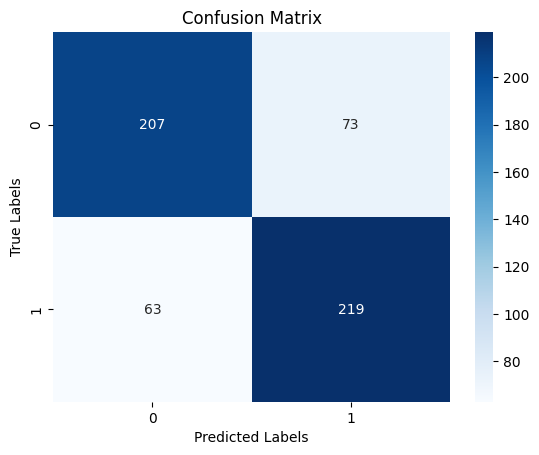

In [65]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

plt = conf_plot(cm)
plt.show()

<b>Decision Tree

Accuracy: 0.7384341637010676


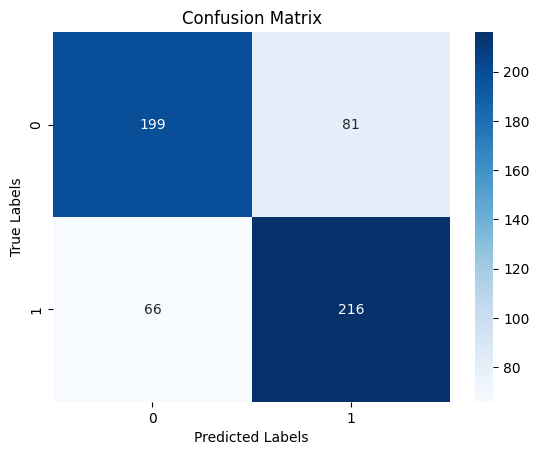

In [66]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_dt)

plt = conf_plot(cm)
plt.show()

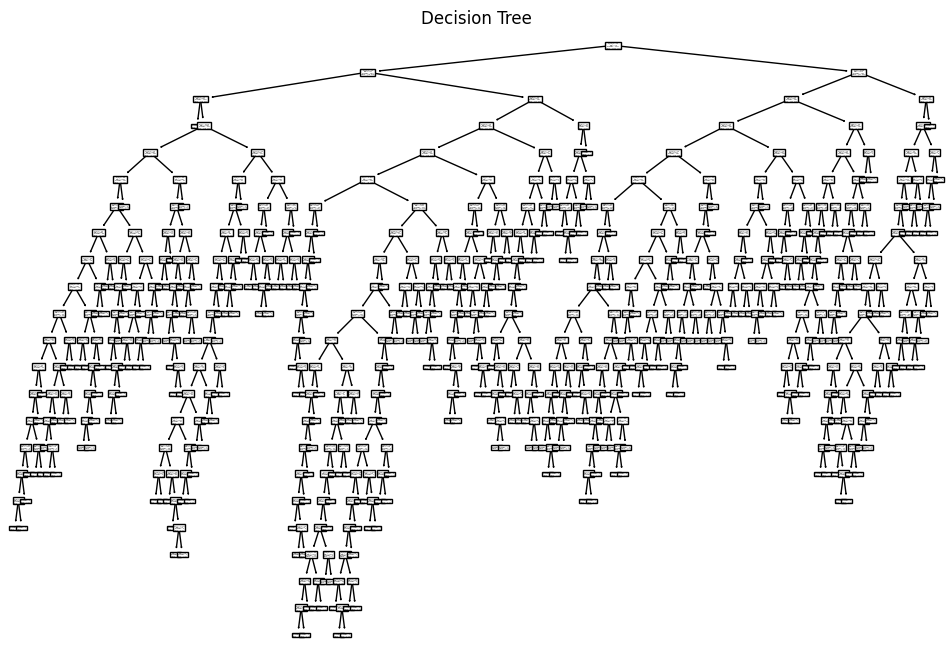

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(model_dt, ax=ax)
plt.title("Decision Tree")
plt.show()

<b>Random Forest

Accuracy: 0.7669039145907474


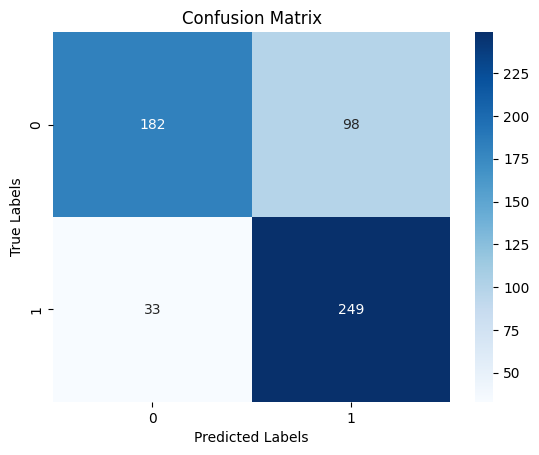

In [68]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_rf)

plt = conf_plot(cm)
plt.show()